# Analýza dat pomocí Pandas

![](http://www.priroda.cz/clanky/foto/panda3.jpg)

Nejprvé naimportujeme potřebné baličky.
Pokud tyto baličky nemáte, nainstalujte je pomocí následujících príkazů v příkazovém řádku.

`sudo apt-get install python3-pandas`

`sudo apt-get install python3-matplotlib`

Společně s `pandas` by mělo být nainstalovaný baliček `numpy`. Pokud ne, nainstalujtě jej pomocí následujícího příkazu:

`sudo apt-get install python-numpy`

In [73]:
import pandas as pd
import numpy as np
import matplotlib as plt

Načteme data do DataFrame a pojmenujeme sloupce.

In [74]:
df = pd.read_table("/home/nasta/Documents/python_bio/apples/apple.genes", header=None)
df.columns = ["Gen", "Transkript", "Chromozom", "Retezec", "Start", "Stop", "Exony"] 

Podíváme se na začátek a konec tabulky.

In [75]:
df.head()

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony
0,MDP0000303933,MDP0000303933,chr1,-,4276,5447,"(4276-4368,4423-4542,4733-4911,5321-5447)"
1,MDP0000223353,MDP0000223353,chr1,+,77339,79628,"(77339-77399,77484-77524,77589-77630,78413-784..."
2,MDP0000322928,MDP0000322928,chr1,+,103533,103686,(103533-103686)
3,MDP0000151845,MDP0000151845,chr1,-,121369,122541,(121369-122541)
4,MDP0000307409,MDP0000307409,chr1,-,123810,125906,"(123810-125614,125804-125906)"


In [76]:
df.tail()

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony
5451,MDP0000165503,MDP0000165503,chr3,-,39871832,39875913,"(39871832-39871939,39872744-39872807,39872992-..."
5452,MDP0000575784,MDP0000575784,chr3,-,39877141,39877811,"(39877141-39877434,39877686-39877811)"
5453,MDP0000575784,MDP0000575784.1,chr3,-,39877141,39877811,"(39877141-39877434,39877500-39877550,39877686-..."
5454,MDP0000647499,MDP0000647499,chr3,+,39898182,39898847,(39898182-39898847)
5455,MDP0000216874,MDP0000216874,chr3,-,39902674,39906448,"(39902674-39902837,39902954-39903045,39903532-..."


Zjistíme, jaký datový typ má naše tabulka.

In [77]:
type(df)

pandas.core.frame.DataFrame

Zjistíme počet řádků a slopců pomocí `df.shape`

In [78]:
df.shape

(5456, 7)

Podíváme se na to, jaké datové typy obsahuje naše tabulka.

In [79]:
df.dtypes

Gen           object
Transkript    object
Chromozom     object
Retezec       object
Start          int64
Stop           int64
Exony         object
dtype: object

Tady je seznam datových typů v `DataFrame`

Pandas Type | Native Python Type | Description
------------ | ----------------- | -----------
object | string |The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings).
int64 | int | Numeric characters. 64 refers to the memory allocated to hold this character.
float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64, in case your missing value has a decimal.
datetime64, timedelta[ns] | N/A (but see the datetime module in Python's standard library) | Values meant to hold time data. Look into these for time series experiments.

Převzato z [Data Carpentry](http://www.datacarpentry.org/python-ecology-lesson/03-data-types-and-format)

Přidáme sloupec "Počet_exonů".

In [80]:
df["Pocet_exonu"] = df["Exony"].str.count("-")
df.head()

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu
0,MDP0000303933,MDP0000303933,chr1,-,4276,5447,"(4276-4368,4423-4542,4733-4911,5321-5447)",4
1,MDP0000223353,MDP0000223353,chr1,+,77339,79628,"(77339-77399,77484-77524,77589-77630,78413-784...",7
2,MDP0000322928,MDP0000322928,chr1,+,103533,103686,(103533-103686),1
3,MDP0000151845,MDP0000151845,chr1,-,121369,122541,(121369-122541),1
4,MDP0000307409,MDP0000307409,chr1,-,123810,125906,"(123810-125614,125804-125906)",2


Přidáme sloupec "Velikost_genu".

In [81]:
df["Velikost_genu"] = df["Stop"]-df["Start"]
df.head()

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu,Velikost_genu
0,MDP0000303933,MDP0000303933,chr1,-,4276,5447,"(4276-4368,4423-4542,4733-4911,5321-5447)",4,1171
1,MDP0000223353,MDP0000223353,chr1,+,77339,79628,"(77339-77399,77484-77524,77589-77630,78413-784...",7,2289
2,MDP0000322928,MDP0000322928,chr1,+,103533,103686,(103533-103686),1,153
3,MDP0000151845,MDP0000151845,chr1,-,121369,122541,(121369-122541),1,1172
4,MDP0000307409,MDP0000307409,chr1,-,123810,125906,"(123810-125614,125804-125906)",2,2096


Podíváme se na popisnou statistiku numerických sloupců pomocí `df.describe`.

V nášem případě jsou to jenom 4 sloupce, z čehož popisná statistika dává smysl jenom u sloupců "Počet_exonů" a "Velikost_genu".

In [82]:
df.describe()

,Start,Stop,Pocet_exonu,Velikost_genu
count,5456.000000,5456.000000,5456.000000,5456.000000
mean,19787426.791972,19790303.794172,5.077163,2877.002199
std,12017288.385368,12017296.260696,4.906019,2916.799005
min,4276.000000,5447.000000,1.000000,90.000000
25%,8825954.500000,8829904.500000,2.000000,911.750000
50%,19565861.500000,19570904.000000,3.000000,2034.500000
75%,31200448.500000,31202358.500000,7.000000,3792.750000
max,40159902.000000,40163103.000000,63.000000,30951.000000


Vybereme sloupce

In [83]:
df.Gen

0       MDP0000303933
1       MDP0000223353
2       MDP0000322928
3       MDP0000151845
4       MDP0000307409
5       MDP0000153869
6       MDP0000187420
7       MDP0000286949
8       MDP0000482754
9       MDP0000726869
10      MDP0000130529
11      MDP0000834450
12      MDP0000135949
13      MDP0000195757
14      MDP0000025650
15      MDP0000025650
16      MDP0000918616
17      MDP0000907499
18      MDP0000229381
19      MDP0000229382
20      MDP0000648408
21      MDP0000246923
22      MDP0000419196
23      MDP0000434787
24      MDP0000312784
25      MDP0000423722
26      MDP0000413077
27      MDP0000170030
28      MDP0000478153
29      MDP0000249932
            ...      
5426    MDP0000161050
5427    MDP0000930498
5428    MDP0000626322
5429    MDP0000265670
5430    MDP0000163387
5431    MDP0000163388
5432    MDP0000123032
5433    MDP0000317575
5434    MDP0000251717
5435    MDP0000498699
5436    MDP0000209004
5437    MDP0000367689
5438    MDP0000209003
5439    MDP0000498703
5440    MD

In [84]:
df[["Gen", "Start", "Stop"]]

,Gen,Start,Stop
0,MDP0000303933,4276,5447
1,MDP0000223353,77339,79628
2,MDP0000322928,103533,103686
3,MDP0000151845,121369,122541
4,MDP0000307409,123810,125906
5,MDP0000153869,135056,135555
6,MDP0000187420,157313,161160
7,MDP0000286949,161876,162460
8,MDP0000482754,178517,181369
9,MDP0000726869,218660,220437


Seřadíme sestupně řádky dle velikosti genů a počtu exonů.

In [85]:
df.sort_values(["Velikost_genu", "Pocet_exonu"], ascending=False)

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu,Velikost_genu
3448,MDP0000312088,MDP0000312088,chr2,+,35500600,35531551,"(35500600-35501010,35501120-35501236,35501464-...",50,30951
3953,MDP0000279951,MDP0000279951,chr3,-,5463665,5489261,"(5463665-5463781,5463888-5464147,5489147-5489261)",3,25596
3674,MDP0000321472,MDP0000321472,chr2,-,39915011,39940155,"(39915011-39915090,39915321-39915610,39916106-...",48,25144
4465,MDP0000310012,MDP0000310012,chr3,+,15197957,15221624,"(15197957-15198118,15198432-15198497,15198597-...",49,23667
2528,MDP0000259414,MDP0000259414,chr2,-,12061728,12085345,"(12061728-12061847,12062166-12062378,12062466-...",37,23617
647,MDP0000271982,MDP0000271982,chr1,+,20755546,20778581,"(20755546-20755625,20757466-20757520,20757620-...",20,23035
2515,MDP0000266474,MDP0000266474,chr2,-,11939032,11962051,"(11939032-11939556,11939651-11940202,11940370-...",33,23019
1570,MDP0000322409,MDP0000322409,chr1,-,35590702,35613351,"(35590702-35592167,35592285-35592718,35592827-...",63,22649
1052,MDP0000262883,MDP0000262883,chr1,+,28698320,28719998,"(28698320-28699220,28699392-28699573,28700523-...",20,21678
1952,MDP0000283610,MDP0000283610,chr2,-,4040399,4061683,"(4040399-4040536,4041164-4041287,4041371-40414...",35,21284


Kolik genů má více než jeden transkript?

In [86]:
sum(df["Gen"].value_counts() > 1)

3

Které geny to jsou?

In [87]:
df.set_index("Gen").index.get_duplicates()

['MDP0000025650', 'MDP0000301110', 'MDP0000575784']

Zobrazit jenom ty geny, které mají více než jeden transkript.

In [88]:
df.loc[df["Gen"].isin(df.set_index("Gen").index.get_duplicates())]

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu,Velikost_genu
14,MDP0000025650,MDP0000025650,chr1,+,465389,466698,"(465389-465490,465628-465836,466103-466571,466...",4,1309
15,MDP0000025650,MDP0000025650.2,chr1,+,465389,466698,"(465389-465490,465628-465836,466500-466550,466...",5,1309
2000,MDP0000301110,MDP0000301110,chr2,+,4426543,4430168,"(4426543-4426639,4427651-4427975,4428018-44280...",7,3625
2001,MDP0000301110,MDP0000301110.2,chr2,+,4426543,4430168,"(4426543-4426639,4427651-4427975,4428018-44283...",6,3625
5452,MDP0000575784,MDP0000575784,chr3,-,39877141,39877811,"(39877141-39877434,39877686-39877811)",2,670
5453,MDP0000575784,MDP0000575784.1,chr3,-,39877141,39877811,"(39877141-39877434,39877500-39877550,39877686-...",3,670


Vybereme geny, jejichž transkripty mají více než 7 exonů.

In [89]:
df.loc[df["Pocet_exonu"] > 7]

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu,Velikost_genu
13,MDP0000195757,MDP0000195757,chr1,+,335937,342691,"(335937-336135,336603-336667,336808-336928,337...",17,6754
16,MDP0000918616,MDP0000918616,chr1,-,468182,473982,"(468182-468385,468508-468609,469195-469269,469...",8,5800
17,MDP0000907499,MDP0000907499,chr1,-,580436,584704,"(580436-580513,580722-580812,581360-581448,581...",10,4268
18,MDP0000229381,MDP0000229381,chr1,-,599175,606092,"(599175-599633,599835-599936,600243-600290,600...",14,6917
35,MDP0000154720,MDP0000154720,chr1,-,1491692,1495965,"(1491692-1491907,1491992-1492588,1492745-14929...",10,4273
36,MDP0000262337,MDP0000262337,chr1,+,1495631,1500679,"(1495631-1495703,1495836-1495990,1496393-14964...",11,5048
38,MDP0000259751,MDP0000259751,chr1,-,1520637,1526433,"(1520637-1521254,1522336-1522482,1522624-15227...",8,5796
40,MDP0000244990,MDP0000244990,chr1,+,1831559,1840523,"(1831559-1831777,1831922-1832077,1833011-18331...",11,8964
46,MDP0000170466,MDP0000170466,chr1,+,2523750,2528995,"(2523750-2523939,2524312-2524395,2524896-25250...",9,5245
49,MDP0000274009,MDP0000274009,chr1,-,3094382,3100578,"(3094382-3094610,3094774-3094908,3097052-30973...",8,6196


Zapišeme výslednou tabulku.

In [99]:
df.to_csv("/home/nasta/Documents/python_bio/apples/apple_edited.genes", index=False, sep="\t", encoding="utf-8")

Aby se grafy zobrazovaly v Jupyter Notebooku, použijeme násedující `magic` funkci

In [92]:
%matplotlib inline

Podiváme se na distribuci počtu exonů

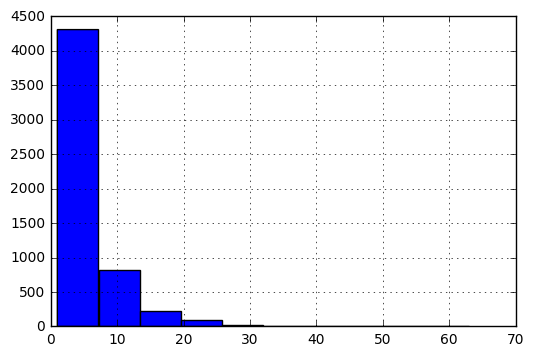

In [93]:
df["Pocet_exonu"].hist(bins=10)

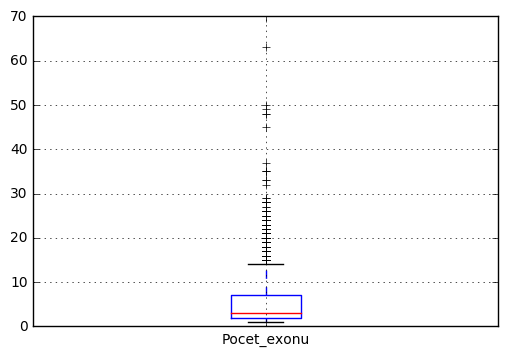

In [94]:
df.boxplot(column="Pocet_exonu", return_type="axes")

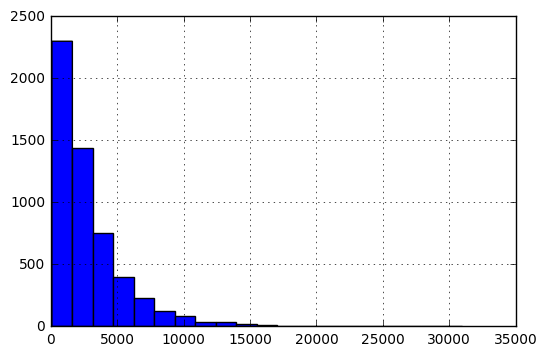

In [95]:
df["Velikost_genu"].hist(bins=20)

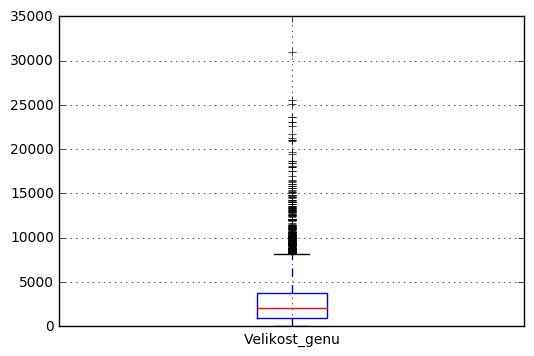

In [96]:
df.boxplot(column="Velikost_genu", return_type="axes")